In [1]:
%matplotlib notebook

from os.path import join
from time import perf_counter

import cv2
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from detectordescriptor import DetectorDescriptor
from utils import get_files_from_array

cv2.ocl.setUseOpenCL(False)
sns.reset_defaults()

/usr/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def run_test(images, in_algos):
    algos = []
    times = []
    nkps = []

    for algo in in_algos:
        print("Running test {}".format(algo.detector_s))

        for image in images:
            start = perf_counter()
            kps = algo.detect_and_compute(image)[0]
            end = perf_counter()

            algos.append(algo.detector_s)
            times.append((end-start)*1000)
            nkps.append(len(kps))

    return pd.DataFrame({'algo': algos, 'time': times, 'nkp': nkps})

def generate_plots(data):
    fig, ax = plt.subplots()

    sns.swarmplot(data=data, x='algo', y='time', ax=ax)

    ax.set_title("Combined speed test")
    ax.set_xlabel("Algorithm")
    ax.set_ylabel("Time taken / ms")
    ax.set_yscale('log')
    ax.grid(which='major', axis='y')
    ax.grid(which='minor', axis='y', linestyle=':', linewidth='0.5')

    fig.savefig(join("results", "combinedspeed.pdf"))
    return fig

In [3]:
algos_s = ['AKAZE', 'BRISK', 'KAZE', 'ORB', 'SIFT', 'SURF']
algos = [DetectorDescriptor(s) for s in algos_s]

dirs = ['bark', 'bikes', 'boat', 'graf', 'leuven', 'trees', 'ubc', 'wall']
files = get_files_from_array(dirs)
images = [cv2.imread(image) for image in files]

data = run_test(images, algos)

Running test AKAZE
Running test BRISK
Running test KAZE
Running test ORB
Running test SIFT
Running test SURF


<IPython.core.display.Javascript object>


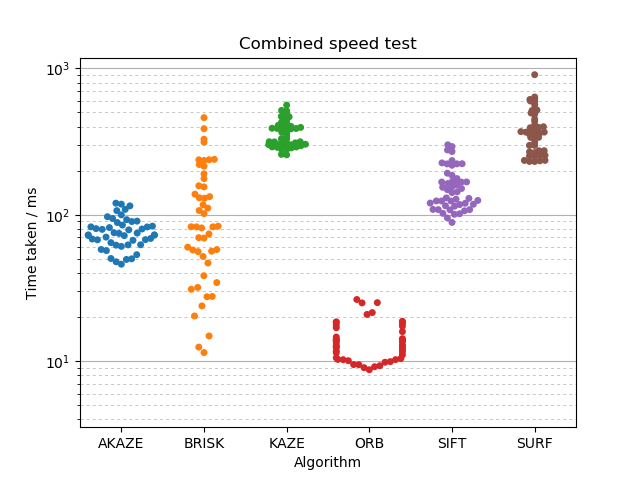

In [4]:
display(generate_plots(data))